# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as owm
from requests.exceptions import HTTPError


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_weather_data = "../CSV/city_weather.data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#test np.random for lat and long
lat1 = np.random.uniform(low = 0.000, high = 90, size = 10 )
print(lat1)
long1 = np.random.uniform(low = 0.000, high = 180.000, size = 10)
print(long1)

[63.71443726 62.18251535  8.37233862 55.4197727  78.38145439 42.03027753
  6.76579029 78.96421644  6.95702163 12.52871424]
[140.26345765  28.75970964 120.63816253  83.33811663 125.28967849
  15.34099555  71.06276776 169.51643033  89.45765158  87.8514612 ]


In [4]:
#testing the zip of the two variables, convert to a list to print
#lat_long1 = []
lat_long1 = list(zip(lat1, long1))
lat_long1

[(63.714437257766825, 140.26345765263443),
 (62.18251534897155, 28.759709641021463),
 (8.37233862336361, 120.63816253177912),
 (55.41977270098562, 83.33811663233881),
 (78.38145438964129, 125.28967848936821),
 (42.03027752578187, 15.340995551700335),
 (6.76579028641885, 71.06276775969995),
 (78.96421644340096, 169.51643032923414),
 (6.957021633711196, 89.45765158392659),
 (12.528714235824612, 87.8514611950011)]

In [5]:
#not part of homework
#test code to learn more about citipy, could not find more reference material for other calls you can make beside nearest city, name
cities1 = []
for x in lat_long1:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities1:
        cities1.append(city)
        


In [51]:
#print(cities1)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

In [7]:
print(cities)

['punta arenas', 'severo-kurilsk', 'tocache', 'rikitea', 'barentsburg', 'korla', 'carnarvon', 'barrow', 'balkanabat', 'yulara', 'taolanaro', 'dikson', 'ushuaia', 'busselton', 'hobart', 'meulaboh', 'bredasdorp', 'pevek', 'salalah', 'sao filipe', 'yellowknife', 'samusu', 'chingirlau', 'peleduy', 'curvelo', 'lethem', 'albany', 'richards bay', 'ugoofaaru', 'belle fourche', 'cherskiy', 'olafsvik', 'puerto ayora', 'qaqortoq', 'mys shmidta', 'grindavik', 'ellensburg', 'lolua', 'baykit', 'hithadhoo', 'qaanaaq', 'astara', 'lagoa', 'mataura', 'souillac', 'uribia', 'sofiysk', 'chokurdakh', 'acarau', 'urumqi', 'jamestown', 'kaitangata', 'tasiilaq', 'san quintin', 'port alfred', 'timmendorfer strand', 'virginia beach', 'wasilla', 'hermanus', 'avarua', 'saint-philippe', 'mehamn', 'hauterive', 'pisco', 'mar del plata', 'atuona', 'nikolskoye', 'flinders', 'thompson', 'diffa', 'aguimes', 'tiksi', 'kapaa', 'cape town', 'labuhan', 'ladnun', 'lata', 'san cristobal', 'new norfolk', 'chernyshevskiy', 'kavie

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [20]:
#method #1 without using the openweathermapy wrapper
#create empty lists to be used in data frame

#weather_data1=[]
#temperature = []
#humidity = []
#cloudiness = []
#windspeed = []
#lat = []
#long = []
#city_name = []

#create a record1 counter
#create variables for the units of measurement(fahrenheit = imperial)
#create variable for units
#create url, it is less clean than the openweather wrapper

#record1 = 0
#units = "imperial"

#url = 'http://api.openweathermap.org/data/2.5/weather?q='

#run a loop for all the cities in our list. 
#append the new data to our empty lists listed above
#for city in cities:
#    city_weather = requests.get(url+city+"&appid="+api_key+"&units="+units).json()
    
#    if city_weather["cod"] == 200:
#        weather_data1.append(city_weather)
#        temperature.append(city_weather["main"]["temp"])
#        humidity.append(city_weather["main"]["humidity"])
#        cloudiness.append(city_weather["clouds"]["all"])
#        windspeed.append(city_weather["wind"]["speed"])
#        lat.append(city_weather["coord"]["lat"])
#        long.append(city_weather["coord"]["lon"])
#        city_name.append(city)
#        record1 += 1
#        print(f'Processing Record {record1} of Set 1 | {city}')
#    else:
#        print(f'City was not found! Skipping.')
#print out once the for loop is complete        
#print("Data download complete.")

In [101]:
#test out the list of weather data that was appended
weather_data1

[{'coord': {'lon': -70.91, 'lat': -53.16},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 54.07,
   'pressure': 1008,
   'humidity': 71,
   'temp_min': 51.8,
   'temp_max': 57},
  'visibility': 10000,
  'wind': {'speed': 5.82, 'deg': 230},
  'clouds': {'all': 75},
  'dt': 1553266987,
  'sys': {'type': 1,
   'id': 8487,
   'message': 0.0043,
   'country': 'CL',
   'sunrise': 1553251691,
   'sunset': 1553295173},
  'id': 3874787,
  'name': 'Punta Arenas',
  'cod': 200},
 {'coord': {'lon': 156.12, 'lat': 50.68},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 29.98,
   'pressure': 983.29,
   'humidity': 96,
   'temp_min': 29.98,
   'temp_max': 29.98,
   'sea_level': 983.29,
   'grnd_level': 970.31},
  'wind': {'speed': 32.84, 'deg': 67.5},
  'clouds': {'all': 92},
  'dt': 1553267258,
  'sys': 

In [21]:
#usint the openweathermapy.core wrapper
#create empty weather_data list to hold info for each city, don't think really need this
#create record counter
#create a summary list to use in wrapper to pull only the information we need

weather_data = []
record = 0
summary = ["name","sys.country","dt","main.temp_max","main.humidity","clouds.all","wind.speed","coord.lat","coord.lon"]

#create for loop with a try and except to help deal with the HTTP:Not Found error, and continue once it gets it

for city in cities:
    try:
        city_weather = owm.get_current(city, **settings)
        data = city_weather(*summary)
        weather_data.append(data)
        record += 1 
        print(f'Processing Record {record} of Set 1 | {city}')
    except Exception as e:
        print(f'The city of {city} was not found! Skipping. Error code was {e}')
        continue
print(f'The OpenWeather API data dump is complete.')        

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | tocache
Processing Record 4 of Set 1 | rikitea
The city of barentsburg was not found! Skipping. Error code was HTTP Error 404: Not Found
The city of korla was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | balkanabat
Processing Record 8 of Set 1 | yulara
The city of taolanaro was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | meulaboh
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | yellowknife
The

Processing Record 157 of Set 1 | kangaatsiaq
Processing Record 158 of Set 1 | hami
The city of mme was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 159 of Set 1 | anjiang
Processing Record 160 of Set 1 | ocampo
Processing Record 161 of Set 1 | tarko-sale
Processing Record 162 of Set 1 | santa fe
Processing Record 163 of Set 1 | henties bay
Processing Record 164 of Set 1 | san vicente de canete
Processing Record 165 of Set 1 | jalu
Processing Record 166 of Set 1 | baker city
Processing Record 167 of Set 1 | bambous virieux
Processing Record 168 of Set 1 | bumba
Processing Record 169 of Set 1 | te anau
Processing Record 170 of Set 1 | nanortalik
The city of westpunt was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 171 of Set 1 | bandarbeyla
Processing Record 172 of Set 1 | paamiut
Processing Record 173 of Set 1 | kuytun
Processing Record 174 of Set 1 | kavaratti
Processing Record 175 of Set 1 | lao cai
Processing Recor

Processing Record 324 of Set 1 | kolyvan
Processing Record 325 of Set 1 | san andres
Processing Record 326 of Set 1 | walvis bay
Processing Record 327 of Set 1 | havre-saint-pierre
Processing Record 328 of Set 1 | sinnamary
Processing Record 329 of Set 1 | contamana
Processing Record 330 of Set 1 | esperance
Processing Record 331 of Set 1 | dukat
Processing Record 332 of Set 1 | arman
Processing Record 333 of Set 1 | primo tapia
Processing Record 334 of Set 1 | marshalltown
Processing Record 335 of Set 1 | doctor juan leon mallorquin
Processing Record 336 of Set 1 | vila velha
Processing Record 337 of Set 1 | sola
Processing Record 338 of Set 1 | iberia
Processing Record 339 of Set 1 | kholm
Processing Record 340 of Set 1 | labuan
Processing Record 341 of Set 1 | gainesville
Processing Record 342 of Set 1 | turayf
Processing Record 343 of Set 1 | alta floresta
Processing Record 344 of Set 1 | arraial do cabo
Processing Record 345 of Set 1 | shaunavon
Processing Record 346 of Set 1 | ge

Processing Record 490 of Set 1 | tingi
Processing Record 491 of Set 1 | pangody
Processing Record 492 of Set 1 | moron
Processing Record 493 of Set 1 | buin
Processing Record 494 of Set 1 | bela vista do paraiso
Processing Record 495 of Set 1 | aksarka
The city of visimo-utkinsk was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 496 of Set 1 | sinjar
Processing Record 497 of Set 1 | cam ranh
The city of asau was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 498 of Set 1 | liverpool
Processing Record 499 of Set 1 | ixtapa
Processing Record 500 of Set 1 | mildura
Processing Record 501 of Set 1 | arrigorriaga
Processing Record 502 of Set 1 | xuddur
Processing Record 503 of Set 1 | road town
Processing Record 504 of Set 1 | erzin
Processing Record 505 of Set 1 | saint-pierre
Processing Record 506 of Set 1 | matara
Processing Record 507 of Set 1 | general roca
Processing Record 508 of Set 1 | portalegre
Processing Record 509

In [14]:
#test out data dump
#print(weather_data)

In [57]:
column_names = ["City","Country","Date","Max Temperature(F)","Humidity","Cloudiness","Wind Speed(mph)","Latitude","Longitude"]
weather_df = pd.DataFrame(weather_data,columns=column_names)
weather_df.dtypes

City                   object
Country                object
Date                    int64
Max Temperature(F)    float64
Humidity                int64
Cloudiness              int64
Wind Speed(mph)       float64
Latitude              float64
Longitude             float64
dtype: object

In [100]:
#weather_df["Date"] = weather_df["Date"].map(lambda val: datetime.datetime.fromtimesstamp(val).strftime('%m-%d-%Y'))
#weather_df["Date"].head()
#weather_df.head()
#weather_df["Date"] = weather_df["Date"].datetime.strftime("%b %d %Y", time.localtime(weather_df["Date"]))
date = weather_df["Date"][0]
date_format = time.strftime("%m/%d/%Y", time.localtime(date))
date_format
#weather_df.head()

#weather_df["Date"] = weather_df["Date"].apply(lambda x: time.strftime("%m/%d/%Y", time.localtime(x))


'03/22/2019'

In [59]:
#Wrapper test
#city_weather = owm.get_current(cities[0], **settings)
#city_weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#convert our df to a csv file 
weather_df.to_csv(city_weather_data, encoding="utf-8", index=False)

In [74]:
#show data frame
weather_df.head()

,City,Country,Date,Max Temperature(F),Humidity,Cloudiness,Wind Speed(mph),Latitude,Longitude
0,Punta Arenas,CL,1553298191,55.40,62,75,6.93,-53.16,-70.91
1,Severo-Kurilsk,RU,1553298057,31.67,97,80,9.19,50.68,156.12
2,Tocache,PE,1553297991,62.09,93,56,1.70,-8.19,-76.51
3,Rikitea,PF,1553298271,78.92,99,68,17.36,-23.12,-134.97
4,Carnarvon,ZA,1553298162,54.53,50,20,7.40,-30.97,22.13


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

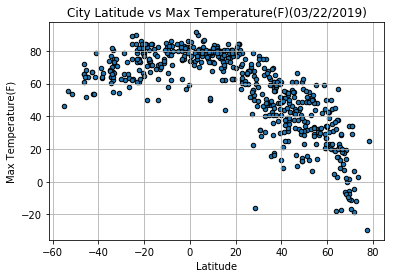

In [93]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Max Temperature(F)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Max Temperature(F)({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_maxtemp.png")
#show plot
plt.show()

#### Latitude vs. Humidity Plot

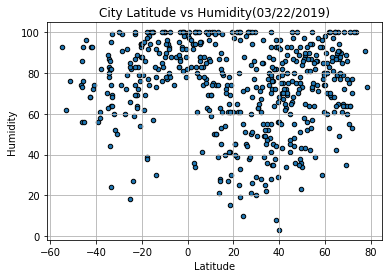

In [95]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Humidity', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Humidity({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_humidity.png")
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

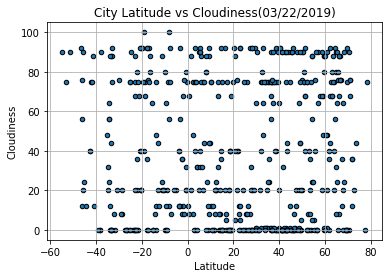

In [97]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Cloudiness', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Cloudiness({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_cloudiness.png")
#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

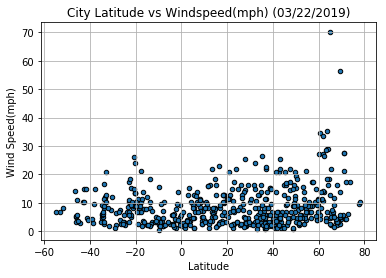

In [99]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Wind Speed(mph)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Windspeed(mph) ({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_windspeed.png")
#show plot
plt.show()